<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_02_selfedu_nn_01a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

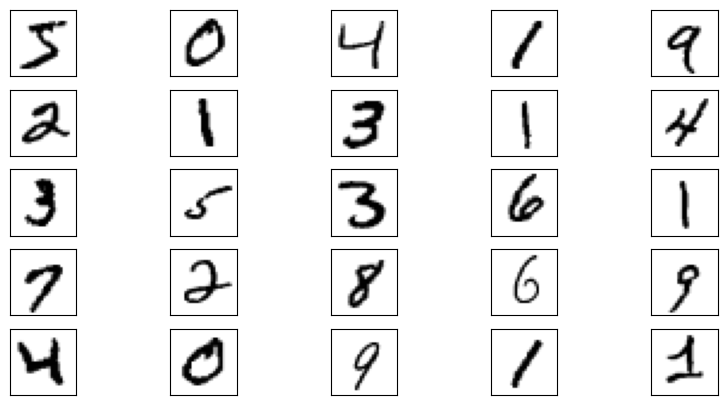

In [ ]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 1.2800 - accuracy: 0.6885 - val_loss: 0.6403 - val_accuracy: 0.8523
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5352 - accuracy: 0.8639 - val_loss: 0.4256 - val_accuracy: 0.8881
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4135 - accuracy: 0.8882 - val_loss: 0.3582 - val_accuracy: 0.9016
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3660 - accuracy: 0.8989 - val_loss: 0.3271 - val_accuracy: 0.9079
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3394 - accuracy: 0.9046 - val_loss: 0.3107 - val_accuracy: 0.9112


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.9091


[0.31763917207717896, 0.9090999960899353]

In [ ]:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

1/1 [==============================] - 1s 518ms/step
[[3.1547260e-03 2.1183938e-05 9.6847814e-01 1.0216610e-02 3.9559369e-09
  2.5304230e-03 1.3088040e-02 6.3759970e-10 2.5108901e-03 7.0978179e-09]]
2


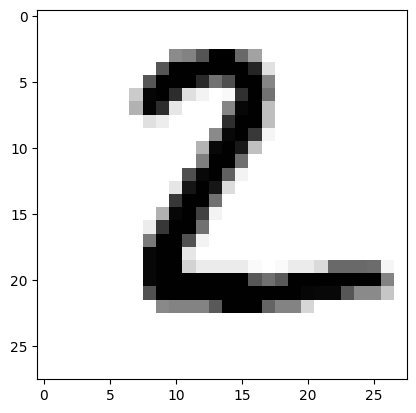

In [ ]:
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(909, 28, 28)


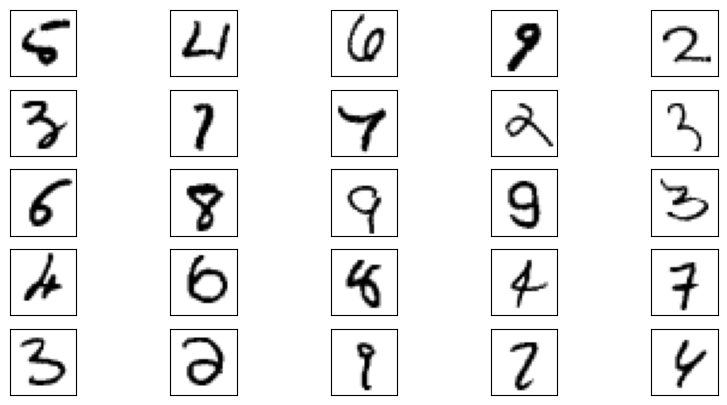

In [ ]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()